In [ ]:
# ============================================================================
# Cell 1: 라이브러리 임포트 및 초기 설정
# ============================================================================
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# 재현 가능한 결과를 위한 시드 설정
np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# ============================================================================
# Cell 2: XOR 데이터셋 준비
# ============================================================================
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

print("XOR Truth Table:")
print("Input -> Expected Output")
print("-" * 25)
for i in range(len(X)):
    print(f"{X[i]} -> {y[i][0]}")

XOR Truth Table:
Input -> Expected Output
-------------------------
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


In [ ]:
# ============================================================================
# Cell 3: MLP 모델 구성 및 초기 가중치 확인
# ============================================================================
model = Sequential([
    Dense(4, input_dim=2, activation='sigmoid', name='hidden_layer'),
    Dense(1, activation='sigmoid', name='output_layer')
])

model.compile(optimizer=Adam(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Initial Random Weights:")
print("=" * 40)
initial_hidden_weights = model.layers[0].get_weights()[0].copy()
initial_hidden_biases = model.layers[0].get_weights()[1].copy()
initial_output_weights = model.layers[1].get_weights()[0].copy()
initial_output_biases = model.layers[1].get_weights()[1].copy()

print("Hidden layer weights:")
print(initial_hidden_weights)
print("Hidden layer biases:", initial_hidden_biases)
print("\nOutput layer weights:", initial_output_weights.flatten())
print("Output layer biases:", initial_output_biases)


Initial Random Weights:
Hidden layer weights:
[[ 0.85225105  0.75900626 -0.3974297   0.21049643]
 [ 0.6028683  -0.6624191   0.03082609 -0.17708421]]
Hidden layer biases: [0. 0. 0. 0.]

Output layer weights: [-0.22678691  0.11852276 -0.01791239 -0.18678439]
Output layer biases: [0.]


In [ ]:
# ============================================================================
# Cell 4: 가중치 변화 추적하면서 학습
# ============================================================================
# 학습 과정에서 가중치 변화를 추적
weight_history = []
loss_history = []
hidden_outputs_history = []

print("\nTracking weight changes during training...")
print("Epoch | Loss     | Hidden Weights (first neuron)")
print("-" * 55)

for epoch in range(500):
    # 학습 전 가중치 저장
    current_weights = {
        'hidden_w': model.layers[0].get_weights()[0].copy(),
        'hidden_b': model.layers[0].get_weights()[1].copy(),
        'output_w': model.layers[1].get_weights()[0].copy(),
        'output_b': model.layers[1].get_weights()[1].copy()
    }

    # 현재 은닉층 출력 계산
    hidden_layer_model = Sequential([model.layers[0]])
    hidden_outputs = hidden_layer_model.predict(X, verbose=0)

    # 한 에포크 학습
    history = model.fit(X, y, epochs=1, verbose=0)

    # 결과 저장
    weight_history.append(current_weights)
    loss_history.append(history.history['loss'][0])
    hidden_outputs_history.append(hidden_outputs.copy())

    # 진행상황 출력 (첫 번째 은닉층 뉴런의 가중치만 표시)
    if epoch % 100 == 0 or epoch < 5:
        w1, w2 = current_weights['hidden_w'][:, 0]  # 첫 번째 뉴런의 가중치
        bias = current_weights['hidden_b'][0]
        loss = history.history['loss'][0]
        print(f"{epoch:5d} | {loss:.6f} | w1={w1:.3f}, w2={w2:.3f}, b={bias:.3f}")

print("Training completed!")


Tracking weight changes during training...
Epoch | Loss     | Hidden Weights (first neuron)
-------------------------------------------------------
    0 | 0.698918 | w1=0.852, w2=0.603, b=0.000


    1 | 0.696265 | w1=0.752, w2=0.503, b=-0.100


    2 | 0.697387 | w1=0.680, w2=0.425, b=-0.156
    3 | 0.694328 | w1=0.625, w2=0.362, b=-0.187
    4 | 0.693176 | w1=0.580, w2=0.307, b=-0.207
  100 | 0.008576 | w1=4.436, w2=4.255, b=-6.586
  200 | 0.002737 | w1=5.590, w2=5.497, b=-8.504
  300 | 0.001499 | w1=6.088, w2=6.007, b=-9.294
  400 | 0.000973 | w1=6.410, w2=6.336, b=-9.798
Training completed!


In [ ]:
# ============================================================================
# Cell 5: 은닉층이 학습한 특징 분석
# ============================================================================
print("\n Hidden Layer Feature Analysis:")
print("=" * 50)

# 최종 은닉층 출력
final_hidden_model = Sequential([model.layers[0]])
final_hidden_outputs = final_hidden_model.predict(X, verbose=0)

print("What each hidden neuron learned:")
print("Input    | Neuron1 | Neuron2 | Neuron3 | Neuron4 | Expected")
print("-" * 65)

for i in range(len(X)):
    outputs = final_hidden_outputs[i]
    expected = y[i][0]
    print(f"{X[i]} | {outputs[0]:.3f}   | {outputs[1]:.3f}   | {outputs[2]:.3f}   | {outputs[3]:.3f}   | {expected}")

# 각 뉴런이 어떤 패턴을 학습했는지 분석
print("\n Pattern Recognition Analysis:")
for neuron in range(4):
    print(f"\nNeuron {neuron+1} activations:")
    activations = final_hidden_outputs[:, neuron]

    # 높은 활성화 vs 낮은 활성화 패턴 찾기
    high_activation = np.where(activations > 0.5)[0]
    low_activation = np.where(activations <= 0.5)[0]

    if len(high_activation) > 0:
        print(f"  High activation (>0.5) for inputs: {[X[i].tolist() for i in high_activation]}")
    if len(low_activation) > 0:
        print(f"  Low activation (≤0.5) for inputs: {[X[i].tolist() for i in low_activation]}")



🧠 Hidden Layer Feature Analysis:
What each hidden neuron learned:
Input    | Neuron1 | Neuron2 | Neuron3 | Neuron4 | Expected
-----------------------------------------------------------------
[0 0] | 0.000   | 0.023   | 0.020   | 0.965   | 0
[0 1] | 0.027   | 0.000   | 0.971   | 0.016   | 1
[1 0] | 0.029   | 0.970   | 0.000   | 0.017   | 1
[1 1] | 0.955   | 0.008   | 0.011   | 0.000   | 0

🔍 Pattern Recognition Analysis:

Neuron 1 activations:
  High activation (>0.5) for inputs: [[1, 1]]
  Low activation (≤0.5) for inputs: [[0, 0], [0, 1], [1, 0]]

Neuron 2 activations:
  High activation (>0.5) for inputs: [[1, 0]]
  Low activation (≤0.5) for inputs: [[0, 0], [0, 1], [1, 1]]

Neuron 3 activations:
  High activation (>0.5) for inputs: [[0, 1]]
  Low activation (≤0.5) for inputs: [[0, 0], [1, 0], [1, 1]]

Neuron 4 activations:
  High activation (>0.5) for inputs: [[0, 0]]
  Low activation (≤0.5) for inputs: [[0, 1], [1, 0], [1, 1]]


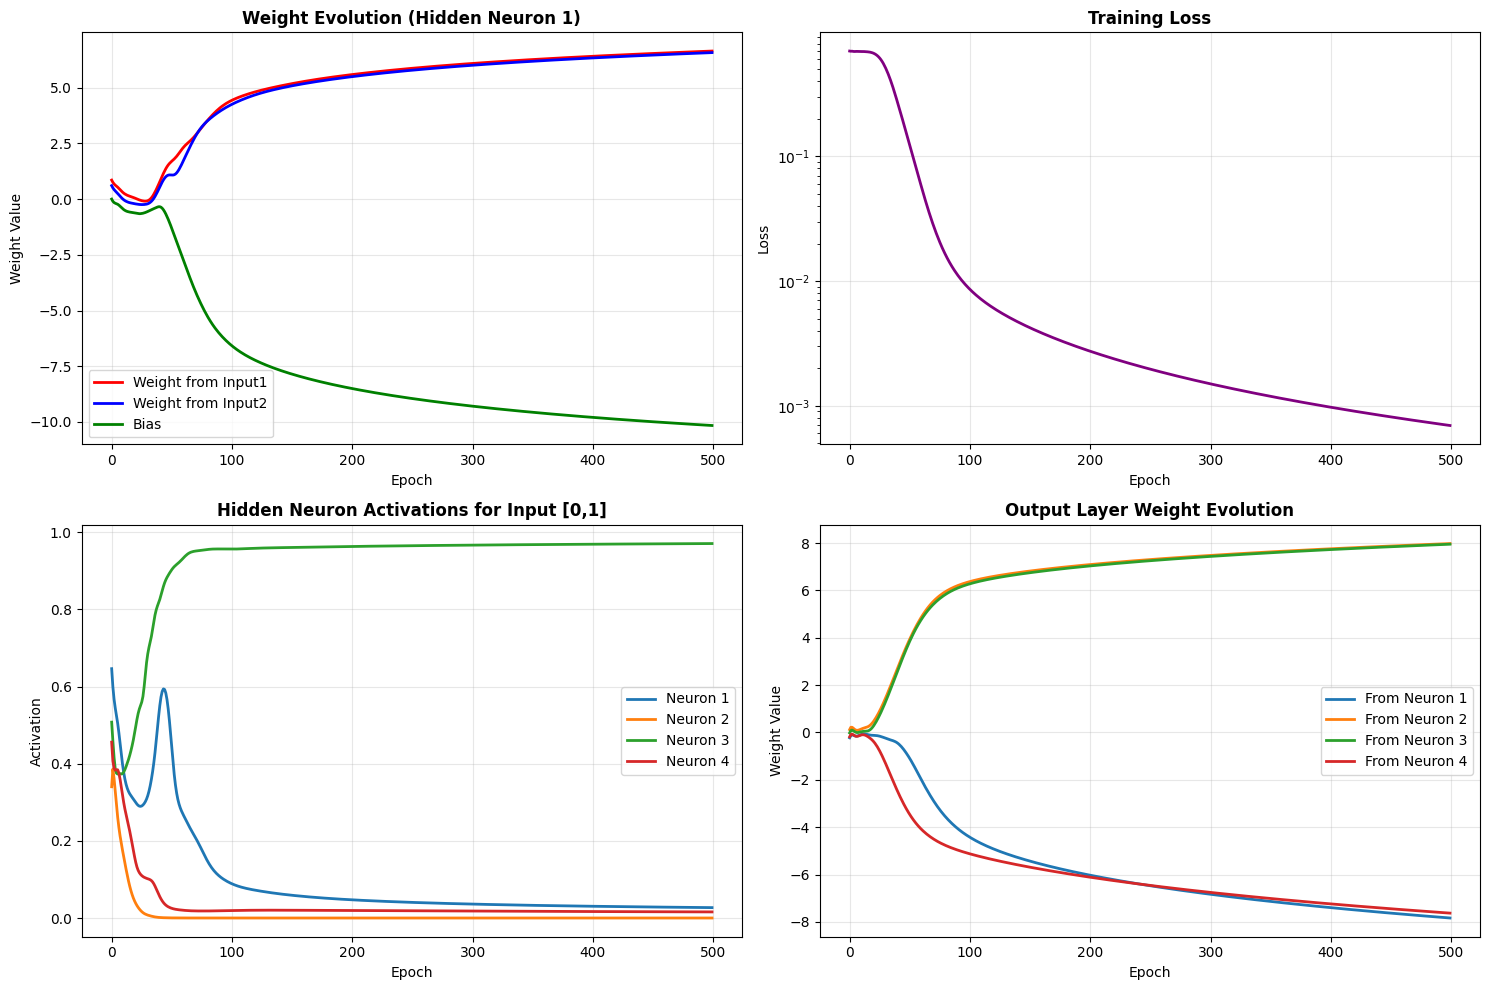

In [ ]:

# ============================================================================
# Cell 6: 가중치 학습 과정 시각화
# ============================================================================
# 가중치 변화 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 첫 번째 은닉층 뉴런의 가중치 변화
epochs = range(len(weight_history))
w1_changes = [w['hidden_w'][0, 0] for w in weight_history]  # input1 -> neuron1
w2_changes = [w['hidden_w'][1, 0] for w in weight_history]  # input2 -> neuron1
b_changes = [w['hidden_b'][0] for w in weight_history]       # bias of neuron1

ax1.plot(epochs, w1_changes, 'r-', label='Weight from Input1', linewidth=2)
ax1.plot(epochs, w2_changes, 'b-', label='Weight from Input2', linewidth=2)
ax1.plot(epochs, b_changes, 'g-', label='Bias', linewidth=2)
ax1.set_title('Weight Evolution (Hidden Neuron 1)', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Weight Value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss 변화
ax2.plot(epochs, loss_history, 'purple', linewidth=2)
ax2.set_title('Training Loss', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# 각 뉴런의 활성화 패턴 변화 (XOR 입력 [0,1]에 대해)
input_idx = 1  # [0,1] 입력
for neuron in range(4):
    activations = [h[input_idx, neuron] for h in hidden_outputs_history]
    ax3.plot(epochs, activations, label=f'Neuron {neuron+1}', linewidth=2)

ax3.set_title('Hidden Neuron Activations for Input [0,1]', fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Activation')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 출력층 가중치 변화
for neuron in range(4):
    output_weights = [w['output_w'][neuron, 0] for w in weight_history]
    ax4.plot(epochs, output_weights, label=f'From Neuron {neuron+1}', linewidth=2)

ax4.set_title('Output Layer Weight Evolution', fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Weight Value')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

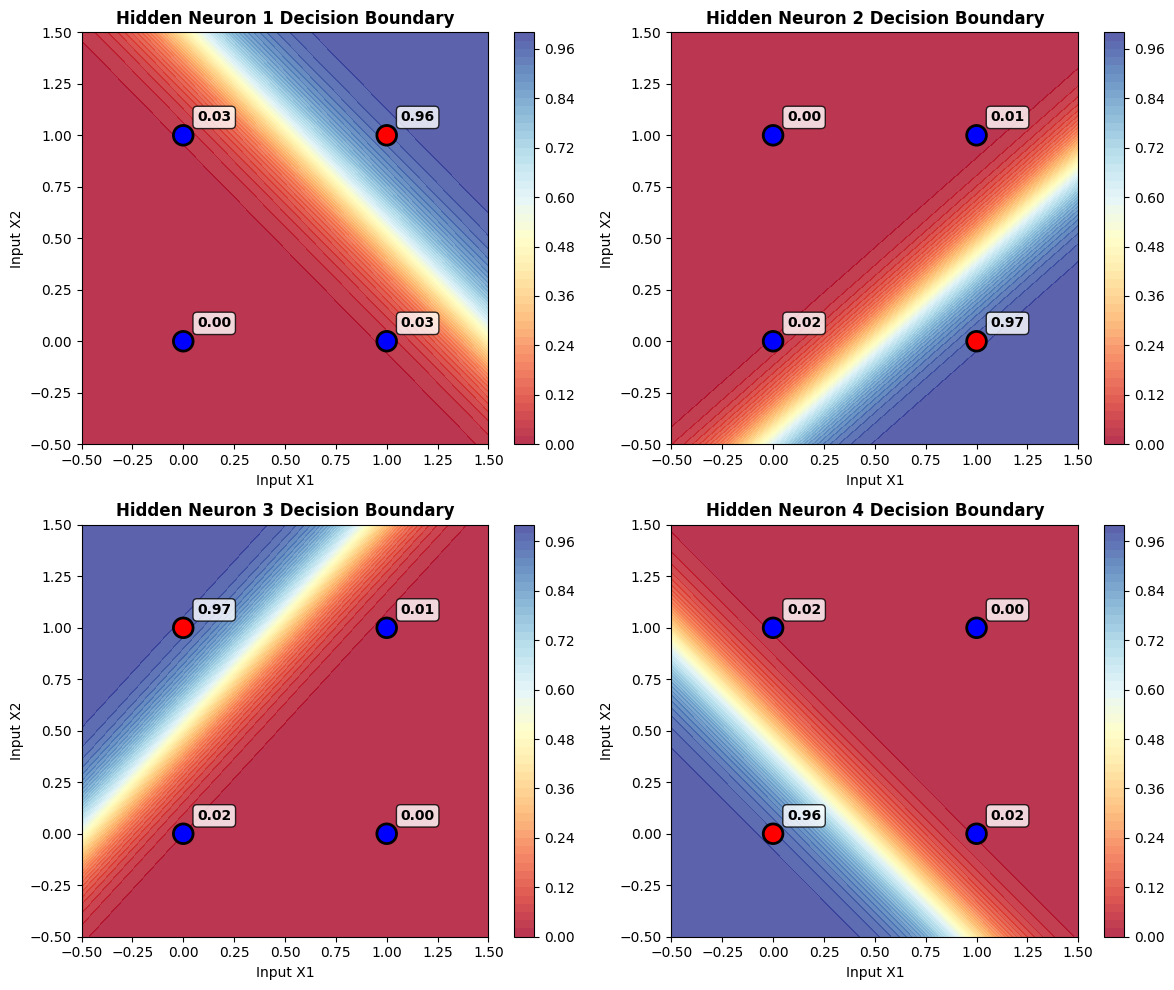

In [ ]:
# ============================================================================
# Cell 7: 은닉층 결정 경계 시각화
# ============================================================================
# 각 은닉층 뉴런의 결정 경계 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 격자 생성
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# 각 은닉층 뉴런의 출력 계산
hidden_model = Sequential([model.layers[0]])
hidden_mesh_outputs = hidden_model.predict(mesh_points, verbose=0)

for neuron in range(4):
    ax = axes[neuron]

    # 해당 뉴런의 출력을 격자로 변환
    Z = hidden_mesh_outputs[:, neuron].reshape(xx.shape)

    # 등고선 플롯
    contour = ax.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(contour, ax=ax)

    # XOR 데이터 포인트 표시
    colors = ['red' if final_hidden_outputs[i, neuron] > 0.5 else 'blue'
              for i in range(len(X))]
    ax.scatter(X[:, 0], X[:, 1], c=colors, s=200, edgecolors='black', linewidth=2)

    # 라벨 추가
    for i, point in enumerate(X):
        activation = final_hidden_outputs[i, neuron]
        ax.annotate(f'{activation:.2f}',
                   (point[0], point[1]),
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    ax.set_title(f'Hidden Neuron {neuron+1} Decision Boundary', fontweight='bold')
    ax.set_xlabel('Input X1')
    ax.set_ylabel('Input X2')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# Cell 8: XOR 해결 메커니즘 분석
# ============================================================================
print("\n How MLP Solves XOR Problem:")
print("=" * 60)

# 최종 가중치
final_hidden_w = model.layers[0].get_weights()[0]
final_hidden_b = model.layers[0].get_weights()[1]
final_output_w = model.layers[1].get_weights()[0].flatten()
final_output_b = model.layers[1].get_weights()[1][0]

print("Step-by-step XOR solution mechanism:")
print("\n1. Each hidden neuron learns different linear separators:")

for neuron in range(4):
    w1, w2 = final_hidden_w[:, neuron]
    bias = final_hidden_b[neuron]
    print(f"   Neuron {neuron+1}: {w1:.3f}*x1 + {w2:.3f}*x2 + {bias:.3f}")

    # 이 뉴런이 어떤 패턴에 반응하는지 분석
    activations = final_hidden_outputs[:, neuron]
    high_inputs = [i for i, act in enumerate(activations) if act > 0.5]
    if high_inputs:
        patterns = [X[i].tolist() for i in high_inputs]
        print(f"      → Activates strongly for: {patterns}")

print(f"\n2. Output layer combines hidden neurons:")
print(f"   Output = sigmoid(", end="")
for neuron in range(4):
    w = final_output_w[neuron]
    sign = "+" if w >= 0 else ""
    print(f"{sign}{w:.3f}*h{neuron+1} ", end="")
print(f"+ {final_output_b:.3f})")

print("\n3. Final XOR computation:")
print("   Input -> Hidden Outputs -> Final Output")
for i in range(len(X)):
    hidden_vals = final_hidden_outputs[i]
    final_pred = model.predict(X[i:i+1], verbose=0)[0][0]
    hidden_str = " ".join([f"{h:.2f}" for h in hidden_vals])
    print(f"   {X[i]} -> [{hidden_str}] -> {final_pred:.3f}")


🎯 How MLP Solves XOR Problem:
Step-by-step XOR solution mechanism:

1. Each hidden neuron learns different linear separators:
   Neuron 1: 6.646*x1 + 6.576*x2 + -10.164
      → Activates strongly for: [[1, 1]]
   Neuron 2: 7.220*x1 + -8.291*x2 + -3.731
      → Activates strongly for: [[1, 0]]
   Neuron 3: -7.955*x1 + 7.380*x2 + -3.880
      → Activates strongly for: [[0, 1]]
   Neuron 4: -7.383*x1 + -7.441*x2 + 3.308
      → Activates strongly for: [[0, 0]]

2. Output layer combines hidden neurons:
   Output = sigmoid(-7.840*h1 +7.980*h2 +7.952*h3 -7.634*h4 + -0.162)

3. Final XOR computation:
   Input -> Hidden Outputs -> Final Output
   [0 0] -> [0.00 0.02 0.02 0.96] -> 0.001
   [0 1] -> [0.03 0.00 0.97 0.02] -> 0.999
   [1 0] -> [0.03 0.97 0.00 0.02] -> 0.999
   [1 1] -> [0.96 0.01 0.01 0.00] -> 0.001



📐 Geometric Interpretation:
XOR is not linearly separable in 2D, but MLP creates a solution by:
1. Each hidden neuron creates a linear decision boundary
2. Hidden layer transforms 2D input to 4D hidden space
3. In 4D space, XOR becomes linearly separable
4. Output layer finds the linear combination in 4D space


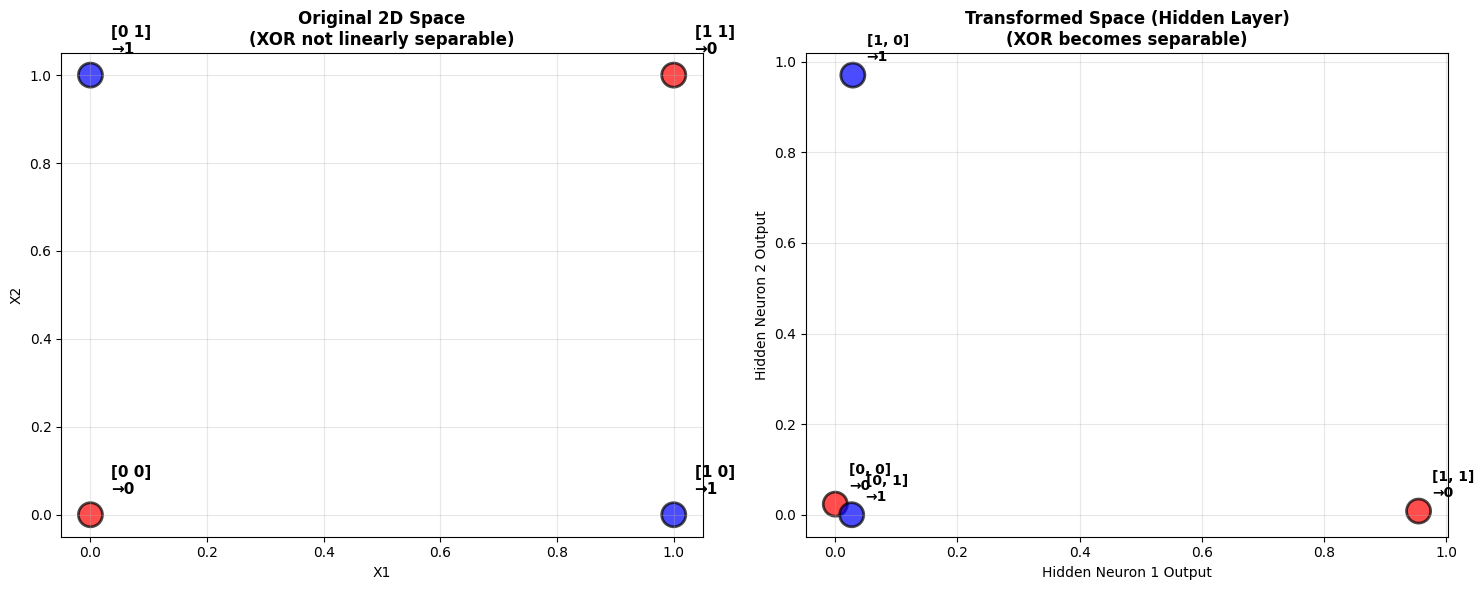


✅ MLP successfully learned to solve XOR by:
   • Creating multiple linear boundaries in hidden layer
   • Transforming input to higher-dimensional space
   • Finding optimal combination in transformed space
   • Each neuron specializes in detecting specific patterns


In [ ]:
# ============================================================================
# Cell 9: 기하학적 해석
# ============================================================================
print("\n Geometric Interpretation:")
print("=" * 40)

print("XOR is not linearly separable in 2D, but MLP creates a solution by:")
print("1. Each hidden neuron creates a linear decision boundary")
print("2. Hidden layer transforms 2D input to 4D hidden space")
print("3. In 4D space, XOR becomes linearly separable")
print("4. Output layer finds the linear combination in 4D space")

# 변환된 공간에서의 XOR 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 원본 2D 공간
colors = ['red' if label[0] == 0 else 'blue' for label in y]
ax1.scatter(X[:, 0], X[:, 1], c=colors, s=300, alpha=0.7, edgecolors='black', linewidth=2)
for i, (point, label) in enumerate(zip(X, y)):
    ax1.annotate(f'{point}\n→{label[0]}', (point[0], point[1]),
                xytext=(15, 15), textcoords='offset points',
                fontsize=11, fontweight='bold')
ax1.set_title('Original 2D Space\n(XOR not linearly separable)', fontweight='bold')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.grid(True, alpha=0.3)

# 변환된 공간 (처음 2개 은닉 뉴런의 출력만 사용)
transformed_X = final_hidden_outputs[:, :2]  # 처음 2개 뉴런만 사용
ax2.scatter(transformed_X[:, 0], transformed_X[:, 1], c=colors, s=300, alpha=0.7,
           edgecolors='black', linewidth=2)
for i, (point, orig_point, label) in enumerate(zip(transformed_X, X, y)):
    ax2.annotate(f'{orig_point.tolist()}\n→{label[0]}',
                (point[0], point[1]),
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax2.set_title('Transformed Space (Hidden Layer)\n(XOR becomes separable)', fontweight='bold')
ax2.set_xlabel('Hidden Neuron 1 Output')
ax2.set_ylabel('Hidden Neuron 2 Output')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n MLP successfully learned to solve XOR by:")
print("   • Creating multiple linear boundaries in hidden layer")
print("   • Transforming input to higher-dimensional space")
print("   • Finding optimal combination in transformed space")
print("   • Each neuron specializes in detecting specific patterns")